# Cubs  2000-2019 Stats

#### What was the Cubs OBP for the last 19 years
- What season had the higest OBP 
- What season had the lowest OBP 
    - Do the two seasons represent the best and worst seasons?
- How strongly do OBP and Wins correlate for Cubs
- Is their avg OBP greater than league average
- Is there a correlation between Cubs OBP and Wins
- Compare Cubs and league wide OBP correlation 
- Determine if league OBP can support Cubs findings
- Dig into Post Season data to see if correlation results map to ps appearance

#### Does ERA correlate to wins 
- 



#### Does position player WAR impact wins 




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr


In [3]:
%matplotlib inline

### Data setup 

In [4]:
teams = pd.read_csv('../lahman-db/core/Teams.csv')

In [5]:
post_season = pd.read_csv('../lahman-db/core/SeriesPost.csv')

In [6]:
teams.shape

(2925, 48)

In [7]:
teams.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')

In [8]:
cubs = teams.loc[(teams['franchID'] == 'CHC') & (teams.yearID >= 2000)]

In [9]:
cubs.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2331,2000,NL,CHN,CHC,C,6,162,81.0,65,97,...,139,0.983,Chicago Cubs,Wrigley Field,2789511.0,97,98,CHC,CHN,CHN
2361,2001,NL,CHN,CHC,C,3,162,81.0,88,74,...,113,0.982,Chicago Cubs,Wrigley Field,2779465.0,95,95,CHC,CHN,CHN
2391,2002,NL,CHN,CHC,C,5,162,78.0,67,95,...,144,0.981,Chicago Cubs,Wrigley Field,2693096.0,98,98,CHC,CHN,CHN
2421,2003,NL,CHN,CHC,C,1,162,81.0,88,74,...,157,0.983,Chicago Cubs,Wrigley Field,2962630.0,101,101,CHC,CHN,CHN
2451,2004,NL,CHN,CHC,C,3,162,82.0,89,73,...,126,0.986,Chicago Cubs,Wrigley Field,3170154.0,103,102,CHC,CHN,CHN


#### Calc OBP
> On-Base Percentage (OBP) measures the most important thing a batter can do at the plate: not make an out.

In [35]:
cubs['OBP'] = (cubs['H'] + cubs['BB'] + cubs['HBP']) / (cubs['AB'] + cubs['BB'] + cubs['HBP'] + cubs['SF'])

<ipython-input-35-b4a948afb34a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cubs['OBP'] = (cubs['H'] + cubs['BB'] + cubs['HBP']) / (cubs['AB'] + cubs['BB'] + cubs['HBP'] + cubs['SF'])


In [36]:
cubs[['yearID', 'OBP']].head()

,yearID,OBP
2331,2000,0.334813
2361,2001,0.336283
2391,2002,0.321220
2421,2003,0.323072
2451,2004,0.328067


### According to fangraphs [data](https://library.fangraphs.com/offense/obp/), the cubs have an avg OBP over the last 19 years

In [38]:
cubs['OBP'].mean()

0.325407275789558

### Cubs team with the higest OBP
#### OBP for the 2008 Season falls into the fangraphs above average category

In [39]:
cubs[['yearID', 'ERA', 'OBP', 'W']].loc[cubs['OBP'] == cubs['OBP'].max()]

,yearID,ERA,OBP,W
2570,2008,3.87,0.35417,97


#### Cubs 2016 was the best season in 19 years

### Cubs team with the lowest OBP
#### OBP for the 2014 Season falls into the fangraphs awful category

In [41]:
cubs[['yearID', 'ERA', 'OBP', 'W']].loc[cubs['OBP'] == cubs['OBP'].min()]

,yearID,ERA,OBP,W
2750,2014,3.91,0.299586,73


#### 2012 was the worst season in the 19 year period according to Wins

In [43]:
cubs[['yearID', 'ERA', 'OBP', 'W']].loc[cubs['W'] == cubs['W'].min()]

,yearID,ERA,OBP,W
2690,2012,4.51,0.301603,61


### As we see from max OBP findings, OBP seems to correlate closely with one of the best seasons in recent Cubs history.
- Cofirm there is a strong correlation between OBP and Wins
- Initial data set was from 2010-2019 and the correlation between OBP and Wins was 0.885
- Stepping back 9 more years from 10 to 19 years dropped correlation value to 0.674

In [44]:
# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
# Same as doing pearsonr(obp, wins)
def correlation(x,y):
    return ((x-x.mean()) * (y-y.mean())).mean() / (x.std(ddof=0) * y.std(ddof=0))

wins = cubs['W']
obp = cubs['OBP']

print(correlation(obp, wins))

0.7059180983961311


In [46]:
pearsonr(obp, wins)

(0.7059180983961311, 0.0005053063955128913)

### Viz the last 19 years of OBP

/usr/local/lib/python3.8/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(6.085000000000001, 0.5, 'Number of Wins')

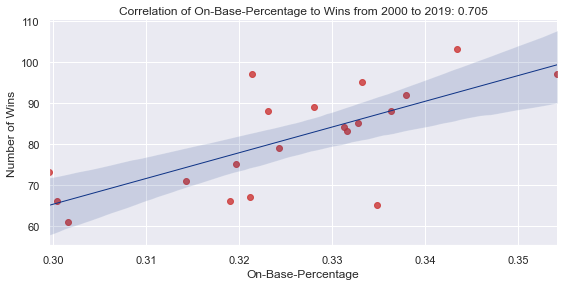

In [47]:
sns.set("notebook")
sns.lmplot('OBP', "W", cubs, palette='#0e3386', scatter_kws={'marker':'o', 'color': '#cc3433'},         
           line_kws={'linewidth':1, 'color': '#0e3386'}, size = 4, aspect = 2)

plt.title('Correlation of On-Base-Percentage to Wins from 2000 to 2019: 0.705')
plt.xlabel('On-Base-Percentage')
plt.ylabel('Number of Wins')

## Perform Significance test on OBP Correlation 
- Test against entire population of MLB data

### Check league OBP and see if the correlation is the similar

In [48]:
league_obp = teams.loc[teams.yearID >= 2000]

In [49]:
league_obp['OBP'] = (league_obp['H'] + league_obp['BB'] +  league_obp['HBP']) / (league_obp['AB'] + league_obp['BB'] + league_obp['HBP'] + league_obp['SF'])



<ipython-input-49-e4d042f0fc3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_obp['OBP'] = (league_obp['H'] + league_obp['BB'] +  league_obp['HBP']) / (league_obp['AB'] + league_obp['BB'] + league_obp['HBP'] + league_obp['SF'])


### League avg is higher than Cubs avg

In [21]:
cubs['OBP'].mean() < league_obp['OBP'].mean()

True

### Highest team OBP in the last 19 years 

In [22]:
league_obp[['yearID', 'franchID', 'Rank', 'DivWin', 'LgWin', 'WCWin', 'WSWin', 'ERA', 'OBP', 'W']].loc[league_obp['OBP'] == league_obp['OBP'].max()]


,yearID,franchID,Rank,DivWin,LgWin,WCWin,WSWin,ERA,OBP,W
2333,2000,CLE,2,N,N,N,N,4.84,0.367022,90


#### Find the top 10 teams of the last 19 years

In [23]:
top_obp = league_obp[['yearID', 'franchID', 'teamID', 'Rank', 'DivWin', 'LgWin', 'WCWin', 'WSWin', 'ERA', 'OBP', 'W']].nlargest(10, 'OBP')

In [78]:
top_obp.sort_values(by='yearID').sort_values(by='yearID')

,yearID,franchID,teamID,Rank,DivWin,LgWin,WCWin,WSWin,ERA,OBP,W,PS
2333,2000,CLE,CLE,2,N,N,N,N,4.84,0.367022,90,False
2334,2000,COL,COL,4,N,N,N,N,5.26,0.361712,82,False
2350,2000,SFG,SFN,1,Y,N,N,N,4.21,0.361702,97,True
2349,2000,SEA,SEA,2,N,N,Y,N,4.49,0.361072,91,True
2337,2000,HOU,HOU,4,N,N,N,N,5.42,0.360576,72,False
2449,2004,BOS,BOS,2,N,Y,Y,Y,4.18,0.359988,98,True
2522,2006,NYY,NYA,1,Y,N,N,N,4.41,0.362716,97,True
2552,2007,NYY,NYA,2,N,N,Y,N,4.49,0.365557,94,True
2538,2007,BOS,BOS,1,Y,Y,N,Y,3.87,0.361789,96,True
2612,2009,NYY,NYA,1,Y,Y,N,Y,4.26,0.361752,103,True


#### Top OBP teams of the last 2 decades are 10 years or older.  
- Is this related to the launch angle era

###### Pull in post season data

In [25]:
post_season.columns

Index(['yearID', 'round', 'teamIDwinner', 'lgIDwinner', 'teamIDloser',
       'lgIDloser', 'wins', 'losses', 'ties'],
      dtype='object')

In [26]:
def calculate_postseason(df):
    for year in df['yearID']:
        winning_team = post_season.loc[post_season.yearID == year]['teamIDwinner'].to_list()
        losing_team = post_season.loc[post_season.yearID == year]['teamIDloser'].to_list()
        ps_teams = set(winning_team + losing_team)
        teams = df.loc[df.yearID == year]['teamID'].to_list()
        for team in teams:
            if team in ps_teams:
                df.loc[(df['yearID'] == year) & (df['teamID'] == team)  , 'PS'] = True
            else:
                df.loc[(df['yearID'] == year) & (df['teamID'] == team), 'PS'] = False
    return df

In [27]:
top_obp = calculate_postseason(top_obp)

In [65]:
league_obp = calculate_postseason(league_obp)

/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


##### Did the teams with the highest OBP reach the post season

In [66]:
top_obp[['yearID','teamID','PS']]

,yearID,teamID,PS
2333,2000,CLE,False
2552,2007,NYA,True
2522,2006,NYA,True
2538,2007,BOS,True
2612,2009,NYA,True
2334,2000,COL,False
2350,2000,SFN,True
2349,2000,SEA,True
2337,2000,HOU,False
2449,2004,BOS,True


##### 70% of the top 10 teams reached the post season

In [67]:
top_obp['PS'].value_counts()

True     7
False    3
Name: PS, dtype: int64

##### 50% of the top 10 teams were in year 2000 
##### Why did the year 2000 have 5 teams with the higest OBP

In [68]:
top_obp['yearID'].value_counts()

2000    5
2007    2
2009    1
2006    1
2004    1
Name: yearID, dtype: int64

#### 30% of the teams with the highest OBP won the WS

In [69]:
top_obp['WSWin'].value_counts()

N    7
Y    3
Name: WSWin, dtype: int64

### Lowest team OBP in the last 19 years 

In [70]:
league_obp['OBP'].min()

0.2920656634746922

In [71]:
league_obp[['yearID', 'franchID', 'Rank', 'DivWin', 'LgWin', 'WCWin', 'WSWin', 'ERA', 'OBP', 'W']].loc[league_obp['OBP'] == league_obp['OBP'].min()]


,yearID,franchID,Rank,DivWin,LgWin,WCWin,WSWin,ERA,OBP,W
2767,2014,SDP,3,N,N,N,N,3.27,0.292066,77


In [72]:
low_obp = league_obp[['yearID', 'franchID', 'teamID', 'Rank', 'DivWin', 'LgWin', 'WCWin', 'WSWin', 'ERA', 'OBP', 'W']].nsmallest(10, 'OBP')

#### We can see the top 10 lowest OBP teams were all from the last 9 years 
#### Is there a correlation between launch angle and the decrease of OBP 

In [73]:
low_obp.sort_values(by='yearID')

,yearID,franchID,teamID,Rank,DivWin,LgWin,WCWin,WSWin,ERA,OBP,W
2648,2010,SEA,SEA,4,N,N,N,N,3.93,0.297965,61
2678,2011,SEA,SEA,4,N,N,N,N,3.90,0.292383,67
2708,2012,SEA,SEA,4,N,N,N,N,3.76,0.295602,75
2729,2013,FLA,MIA,5,N,N,N,N,3.71,0.292638,62
2767,2014,SDP,SDN,3,N,N,N,N,3.27,0.292066,77
2751,2014,CIN,CIN,4,N,N,N,N,3.59,0.296491,76
2887,2018,SDP,SDN,5,N,N,N,N,4.40,0.297311,66
2867,2018,BAL,BAL,5,N,N,N,N,5.18,0.298289,47
2904,2019,DET,DET,5,N,N,N,N,5.24,0.293864,47
2909,2019,FLA,MIA,5,N,N,N,N,4.74,0.298354,57


In [79]:
full_league_obp = league_obp['OBP']
print(correlation(full_league_obp, wins))

0.6810902577809328


In [82]:
pearsonr(league_obp['OBP'], league_obp['PS'])

(0.3797168844102426, 5.144633077780946e-22)

Text(29.276496961805563, 0.5, 'Number of Wins')

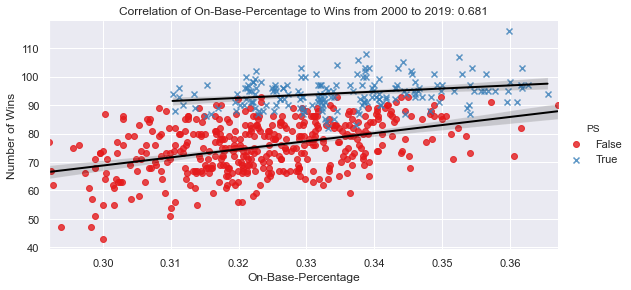

In [85]:
sns.lmplot('OBP', "W", league_obp, hue="PS", markers=['o', 'x'],  palette="Set1", 
           line_kws={'linewidth':2,'color':'black'}, size = 4, aspect = 2)

plt.title('Correlation of On-Base-Percentage to Wins from 2000 to 2019: 0.681')
plt.xlabel('On-Base-Percentage')
plt.ylabel('Number of Wins')

#### 23% of the teams with an OBP over .340 made the post season 

In [76]:
league_obp[(league_obp.OBP <= 0.34)]['PS'].mean() * 100

23.935091277890468

#### Average Post season team had an OBP of 0.335

In [77]:
league_obp[(league_obp.PS == True)]['OBP'].mean()

0.3354966630412032

## OBP Conclusion 
- We observe that in sample (Cubs data) and population (League wide data) both have a positive correlation 
- There is a greater correlation coefficient for in sample than population
- There is an overall moderate positive relationship between OBP and Wins
- There is a a low positive correlation between OBP and Post Season appearance
- Many factors come into play during a Baseball game as seen by the data
- As expected, we can conclude that a team with a higher OBP has a better chance of winning more games. 

### Does ERA also correlate with the number of wins

In [87]:
era = cubs['ERA']
print(correlation(era, wins))

-0.8097383059646235


In [88]:
cubs[['yearID', 'ERA', 'OBP', 'W']]

,yearID,ERA,OBP,W
2331,2000,5.25,0.334813,65
2361,2001,4.03,0.336283,88
2391,2002,4.29,0.321220,67
2421,2003,3.83,0.323072,88
2451,2004,3.81,0.328067,89
2480,2005,4.19,0.324302,79
2510,2006,4.74,0.319037,66
2540,2007,4.04,0.332797,85
2570,2008,3.87,0.354170,97
2600,2009,3.84,0.331607,83


### Find the lowest ERA 

In [110]:
cubs[['yearID', 'ERA', 'OBP', 'W']].loc[cubs['ERA'] == cubs['ERA'].min()]

,yearID,ERA,OBP,W
2810,2016,3.15,0.343452,103


### Find the Highest ERA 

In [111]:
cubs[['yearID', 'ERA', 'OBP', 'W']].loc[cubs['ERA'] == cubs['ERA'].max()]

,yearID,ERA,OBP,W
2331,2000,5.25,0.334813,65


### We can see that ERA and Wins have a negative correlation 
### The lower the ERA the, the higer the number of Wins 

In [112]:
print(correlation(cubs['ERA'], cubs['W']))

-0.8097383059646235


In [113]:
pearsonr(cubs['ERA'], cubs['W'])

(-0.8097383059646236, 1.5199741710607373e-05)

### There is a strong negative correlation between ERA and number of Wins 

/usr/local/lib/python3.8/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(6.085000000000001, 0.5, 'Number of Wins')

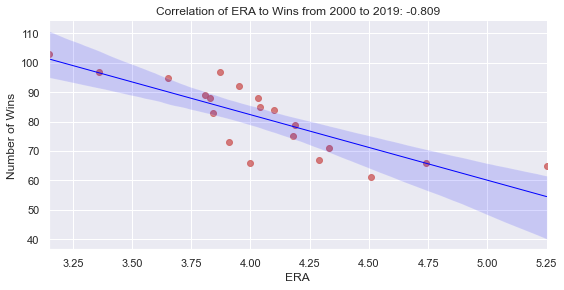

In [114]:
sns.lmplot('ERA', "W", cubs, scatter_kws={'marker':'o', 'color': 'indianred'}, 
           line_kws={'linewidth':1,'color':'blue'}, size = 4, aspect = 2)

plt.title('Correlation of ERA to Wins from 2000 to 2019: -0.809')
plt.xlabel('ERA')
plt.ylabel('Number of Wins')

## Perform Significance test on ERA Correlation 
- Test against entire population of MLB data

In [97]:
league_data = league_obp.copy()

In [148]:
league_data.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro', 'OBP', 'PS'],
      dtype='object')

#### League avg ERA

In [134]:
league_data['ERA'].mean()

4.248

In [135]:
cubs['ERA'].mean()

4.051500000000001

### Overall we can see that the Cubs have a lower average ERA than league avg

In [101]:
cubs['ERA'].mean() < league_data['ERA'].mean()

True

### Comparing correlation results on the entire population depicts a drop from a strong to moderate correlation for ERA and Wins  

In [115]:
print(correlation(league_data['ERA'], league_data['W']))

-0.6554310081223031


/usr/local/lib/python3.8/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(6.085000000000001, 0.5, 'Number of Wins')

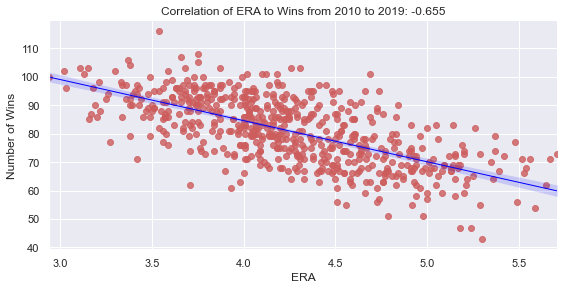

In [116]:
sns.lmplot('ERA', "W", league_data, scatter_kws={'marker':'o', 'color': 'indianred'}, 
           line_kws={'linewidth':1,'color':'blue'}, size = 4, aspect = 2)

plt.title('Correlation of ERA to Wins from 2010 to 2019: -0.655')
plt.xlabel('ERA')
plt.ylabel('Number of Wins')

### Low correlation between ERA and PS appearance 

In [117]:
pearsonr(league_obp['ERA'], league_obp['PS'])

(-0.4681482147309812, 5.20090647292408e-34)

### Summary statistics on ERA

In [118]:
league_obp['ERA'].describe()

count    600.000000
mean       4.248000
std        0.534891
min        2.940000
25%        3.860000
50%        4.205000
75%        4.602500
max        5.710000
Name: ERA, dtype: float64

### Pull out the teams in the top 25th percentile 

In [158]:
top_quarter_era = league_obp[(league_obp['ERA'] <= 3.860)][['yearID', 'franchID', 'teamID', 'PS', 'Rank', 'DivWin', 'LgWin', 'WCWin', 'WSWin', 'ERA', 'OBP', 'E', 'HR', 'R', 'H','2B', '3B', 'W']]

### 62% of the teams in the top 25th percentile make the post season

In [159]:
top_quarter_era['PS'].mean()

0.6225165562913907

### 6.6% of the teams in the 25th percentile won the WS

In [170]:
(len(top_quarter_era[top_quarter_era['WSWin'] == 'Y']) / len(top_quarter_era)) * 100

6.622516556291391

### What are the avg stats 

In [163]:
top_quarter_era[top_quarter_era['WSWin'] == 'Y'].mean()

yearID    2011.60000
PS           1.00000
Rank         1.30000
ERA          3.60000
OBP          0.33164
E           93.10000
HR         163.50000
R          769.50000
H         1486.00000
2B         303.30000
3B          33.80000
W           96.50000
dtype: float64

### Team with the lowest ERA

In [166]:
top_quarter_era[top_quarter_era['ERA'].min() == top_quarter_era['ERA']]

,yearID,franchID,teamID,PS,Rank,DivWin,LgWin,WCWin,WSWin,ERA,OBP,E,HR,R,H,2B,3B,W
2800,2015,STL,SLN,True,1,Y,N,N,N,2.94,0.321089,96,137,647,1386,288,39,100


### Team with the higest ERA 

In [167]:
top_quarter_era[top_quarter_era['ERA'].max() == top_quarter_era['ERA']]

,yearID,franchID,teamID,PS,Rank,DivWin,LgWin,WCWin,WSWin,ERA,OBP,E,HR,R,H,2B,3B,W
2427,2003,HOU,HOU,False,2,N,N,N,N,3.86,0.336156,95,191,805,1466,308,30,87
2706,2012,PIT,PIT,False,4,N,N,N,N,3.86,0.303763,112,170,651,1313,241,37,79


## ERA Conculsion
- We observe that in sample (Cubs data) and population (League wide data) both have a negative correlation 
- There is a greater correlation coefficient for in sample than population
- There is a rather large difference of 0.154 between in sample and population
- There is a a low nearing moderate negative correlation between ERA and Post Season appearance
- As expected, we can conclude that a team with a lower ERA has a better chance of winning more games. 

### Lets confirm the hypothesis that a higher team WAR is highly correlated to team wins 
(Batting Runs + Base Running Runs +Fielding Runs + Positional Adjustment + League Adjustment +Replacement Runs) / (Runs Per Win

In [49]:
cubs.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro', 'OBP'],
      dtype='object')

### Pull in data from Fangraphs to calc team WAR by Position Players

In [50]:
fangraphs = pd.read_csv('../input/FanGraphsData.csv')

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [51]:
fangraphs.columns

Index(['Season', 'Name', 'Team', 'Age', 'G', 'AB', 'PA', 'H', '1B', '2B',
       ...
       'GB%+', 'FB%+', 'HR/FB%+', 'Pull%+', 'Cent%+', 'Oppo%+', 'Soft%+',
       'Med%+', 'Hard%+', 'playerid'],
      dtype='object', length=305)

### Select Cubs players from 2006 to Present

In [52]:
cubs_player_stats = fangraphs.loc[(fangraphs['Team'] == 'Cubs') & (fangraphs['Season'] >= 2006)]

In [53]:
cubs_player_stats.loc[cubs_player_stats.Season == 2006][['Season','WAR']].sort_values(by="Season")

,Season,WAR
112,2006,3.7
141,2006,2.3
266,2006,0.7
328,2006,2.8
341,2006,1.4
738,2006,3.1
809,2006,0.7
849,2006,0.3
1062,2006,-0.6
1088,2006,-1.8


In [54]:
### Team data is only 

In [55]:
def calculate_war():
    for year in cubs_player_stats.Season.unique():
        war = cubs_player_stats['WAR'].loc[cubs_player_stats.Season == year].sum()
        cubs.loc[cubs['yearID'] == year, 'WAR'] = np.round(war, 2)

In [56]:
calculate_war()

/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [57]:
cubs[['yearID','WAR']].sort_values(by='yearID').tail(14)

,yearID,WAR
2510,2006,12.6
2540,2007,22.0
2570,2008,26.8
2600,2009,12.5
2630,2010,14.5
2660,2011,15.8
2690,2012,12.8
2720,2013,10.7
2750,2014,13.3
2780,2015,26.5


### Find correlation between Wins and Team War

In [58]:
wins = cubs['W']
war = cubs['WAR']

print(correlation(war, wins))

0.9736568166910439


/usr/local/lib/python3.8/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(6.085000000000001, 0.5, 'Number of Wins')

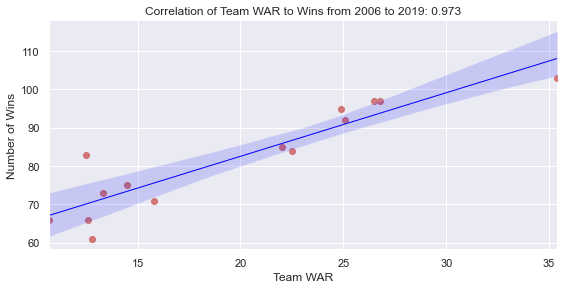

In [59]:
sns.lmplot('WAR', "W", cubs, scatter_kws={'marker':'o', 'color': 'indianred'}, 
           line_kws={'linewidth':1,'color':'blue'}, size = 4, aspect = 2)

plt.title('Correlation of Team WAR to Wins from 2006 to 2019: 0.973')
plt.xlabel('Team WAR')
plt.ylabel('Number of Wins')

In [60]:
cubs_player_stats['WAR'].max()
low_war_player = cubs_player_stats[(cubs_player_stats['WAR'] < 0) & (cubs_player_stats['G'] > 81)][['Season','Name', 'Team', 'Age', 'G', 'WAR']]


### Look at other stats that correlate

In [ ]:
mask = np.tril(league_obp.corr())
plt.figure(figsize = (25,25))
sns.heatmap(league_obp.corr(), fmt='.1g', annot = True, cmap= 'Blues_r', mask=mask, linewidths=2, linecolor='whitesmoke')


In [61]:
low_war_player.sort_values(by='Season')

,Season,Name,Team,Age,G,WAR
1062,2006,John Mabry,Cubs,35,107,-0.6
1088,2006,Ronny Cedeno,Cubs,23,151,-1.8
2023,2009,Alfonso Soriano,Cubs,33,117,-0.1
2454,2009,Koyie Hill,Cubs,30,83,-0.5
2292,2010,Xavier Nady,Cubs,31,119,-0.7
2605,2012,Joe Mather,Cubs,29,103,-1.2
3771,2013,Darwin Barney,Cubs,27,141,-0.3
3694,2014,Mike Olt,Cubs,25,89,-0.5
3732,2014,Junior Lake,Cubs,24,108,-0.4
5240,2019,Albert Almora Jr.,Cubs,25,130,-0.7


In [62]:
low_war_player['Season'].value_counts()

2014    2
2009    2
2006    2
2019    2
2013    1
2012    1
2010    1
Name: Season, dtype: int64

In [63]:
high_war_player = cubs_player_stats[cubs_player_stats['WAR'] > 4]
high_war_player[['Season', 'Name', 'Team', 'Age', 'G', 'WAR']].sort_values(by='Season')

,Season,Name,Team,Age,G,WAR
91,2007,Aramis Ramirez,Cubs,29,132,4.8
128,2007,Alfonso Soriano,Cubs,31,135,6.7
94,2008,Aramis Ramirez,Cubs,30,149,4.5
163,2008,Mark DeRosa,Cubs,33,149,4.2
1157,2009,Derrek Lee,Cubs,33,141,5.2
1215,2010,Geovany Soto,Cubs,27,105,4.1
2705,2014,Anthony Rizzo,Cubs,24,140,5.3
2759,2015,Kris Bryant,Cubs,23,151,6.1
2727,2015,Anthony Rizzo,Cubs,25,160,5.2
3871,2016,Kris Bryant,Cubs,24,155,7.9


In [64]:
cubs_player_stats[cubs_player_stats.Name == 'Anthony Rizzo'][['Age','WAR', 'G', 'AVG', 'H', 'HR','Season']].sort_values(by='Season')

,Age,WAR,G,AVG,H,HR,Season
1515,22,1.6,87,0.285,96,15,2012
3117,23,1.8,160,0.233,141,23,2013
2705,24,5.3,140,0.286,150,32,2014
2727,25,5.2,160,0.278,163,31,2015
3886,26,4.9,155,0.292,170,32,2016
3926,27,4.1,157,0.273,156,32,2017
4076,28,2.9,153,0.283,160,25,2018
3891,29,4.0,146,0.293,150,27,2019


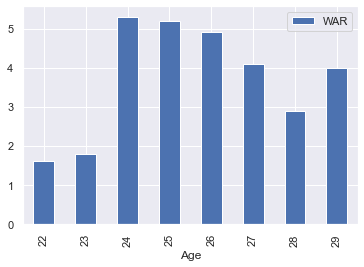

In [65]:
cubs_player_stats[cubs_player_stats.Name == 'Anthony Rizzo'][['WAR', 'Age']].sort_values(by='Age').plot(x='Age', y='WAR', kind='bar')

In [66]:
cubs_player_stats[cubs_player_stats.Name.str.contains('Willson')][['Age','G','WAR', 'Season']]

,Age,G,WAR,Season
3997,27,105,2.7,2019
4038,24,76,2.5,2016
4044,25,117,2.4,2017
4594,26,138,0.7,2018


In [67]:
cubs_player_stats[cubs_player_stats.Name == 'Willson Contreras'][['Age','G','WAR', 'Season']]

,Age,G,WAR,Season
3997,27,105,2.7,2019
4038,24,76,2.5,2016
4044,25,117,2.4,2017
4594,26,138,0.7,2018
